In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)  # please do not remove this line
import pandas as pd

### Question 2

In [2]:
def load_data_from_file(file_name="./data/advertising.csv"):
  data = pd.read_csv(file_name).to_numpy()
  features_x = data[:, :3]
  sales_y = data[:, 3]
  
  N = features_x.shape[0]

  # Thêm một cột toàn giá trị 1 vào phía trước của X
  x_b = np.c_[np.ones((N, 1)), features_x]

  return x_b, sales_y


features_x, _ = load_data_from_file()
print(features_x[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


### Question 3

In [3]:
_, sales_y = load_data_from_file()
print (sales_y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5) * bound

In [5]:
def create_individual (n = 4, bound =10):
    individual = [generate_random_value(bound) for i in range(n)]
    return individual
individual = create_individual()
print (individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
def predict(x, individual):
    theta = np.array(individual)
    y_hat = x.dot(theta)
    return y_hat

def compute_loss(y_hat, y):
    loss = np.multiply((y_hat - y), (y_hat - y)).mean()
    return loss

# individual 
def compute_fitness(individual, features_x, sales_y):
    y_hat = predict(features_x, individual)
    loss = compute_loss(y_hat, sales_y)
    fitness_value = 1 / (loss + 1)

    return fitness_value

### Question 4

In [7]:
features_x, _ = load_data_from_file()
features_x, sales_y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual, features_x, sales_y)
print(fitness_score)

1.0185991537088997e-06


### Question 5

In [8]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1_new)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

    return individual1_new, individual2_new

In [9]:
# question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


### Question 6:

In [10]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    return [generate_random_value() if random.random() < mutation_rate else val for val in individual_m]

In [11]:
# Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print("After mutation: ", after_individual)
print(before_individual == after_individual)

After mutation:  [0.833820394550312, 0.046868558173902564, 2.5580420415722394, -2.4949365863755943]
False


In [12]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

In [13]:
population = initialize_population(100)
print(len(population))

100


#### Thiết kế hàm selection : không được chọn 2 phần tử trùng nhau , phần tử thứ 2 > 1 

In [14]:
# population được sorted tăng dần
def select(population_sorted, m = 100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if index1 != index2:
            break

    if index2 > index1: 
        return population_sorted[index2]
    else:
        return population_sorted[index1]

In [15]:
population = initialize_population(m=100)
individual_s = select(population, m=100)
print(individual_s)

[-1.7707102346493941, -0.44255615074371035, -1.7485653418675173, -4.711708834619053]


In [16]:
# population được sắp xếp tăng dần
def create_new_population(population, features_x, sales_y, elitism=2, gen=1):
    m = len(population)
    
    sorted_population = sorted(population, key=lambda individual: compute_fitness(
        individual, features_x, sales_y))

    y_hat = predict(features_x, sorted_population[m - 1])
    if gen %1 == 0:
        print("Best loss :", compute_loss(y_hat, sales_y),
              "with chromsome: ", sorted_population[m - 1])
        
    new_population = []
    new_population.extend(sorted_population[m-elitism:])
    while len(new_population) < m:
        # selection
        parent1 = select(population_sorted=sorted_population, m=m)
        parent2 = select(population_sorted=sorted_population, m=m)
        
        # crossover
        child1, child2 = crossover(parent1, parent2)
        
        # mutation
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    return new_population[: m], compute_loss(y_hat, sales_y)

### Question 7

In [17]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population = create_new_population(old_population,features_x, sales_y, elitism=2, gen=1)

Best loss : 123415.05152880498 with chromsome:  [3.44, 2.57, -0.79, -2.41]


### Bài tập 9 (All-in-one) Hãy hoàn thiện function run_ga() để tìm tham số θ1, θ2, θ3, θ4 tối ưu sử dụn giải thuật di truyền.

In [18]:
def run_ga():
  n_generations = 100
  m = 600
  features_x, sales_y = load_data_from_file()
  population = initialize_population(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(
        population, features_x, sales_y, elitism=2, gen=i)
    
    losses_list.append(losses)
    
  return losses_list, population

In [19]:
losses_list, population = run_ga()

Best loss : 2326.1764485526114 with chromsome:  [0.022221826851781534, -0.13321941847678542, -1.8547606082321588, 1.839217394712661]
Best loss : 1443.9538838801056 with chromsome:  [-1.8032164891002678, -0.10604215149170648, 2.6521635987222725, -0.7916891144036697]
Best loss : 294.80655023865455 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, 0.06795122276368581]
Best loss : 294.80655023865455 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, 0.06795122276368581]


Best loss : 294.80655023865455 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, 0.06795122276368581]
Best loss : 194.75765919139522 with chromsome:  [-1.536557907978603, 0.09294055512451882, 0.18682215420964599, 0.3190190964552775]
Best loss : 109.04732560917573 with chromsome:  [-4.132050078805002, 0.1264912163847609, 0.5439110163103444, -0.3664078533646009]
Best loss : 108.45153157529143 with chromsome:  [-4.7355836317883995, 0.1264912163847609, 0.5439110163103444, -0.3664078533646009]
Best loss : 66.90833299896153 with chromsome:  [-3.8898354186025754, 0.02122932694819113, 0.5715949597665337, 0.08012164386884346]
Best loss : 60.42929225814178 with chromsome:  [-3.8898354186025754, 0.02122932694819113, 0.5439110163103444, 0.06795122276368581]
Best loss : 60.42929225814178 with chromsome:  [-3.8898354186025754, 0.02122932694819113, 0.5439110163103444, 0.06795122276368581]
Best loss : 31.04171336038633 with chromsome:  [-1.536557907978603, 0.092940555124518

Best loss : 1049.1103131651498 with chromsome:  [-1.2439864083756291, -0.2097105385284559, 1.4446199087989742, -0.010676274335411629]
Best loss : 775.0166538944145 with chromsome:  [-0.027115714214624997, -0.006320959815662164, 1.4637532163871803, -1.013005521624285]
Best loss : 775.0166538944145 with chromsome:  [-0.027115714214624997, -0.006320959815662164, 1.4637532163871803, -1.013005521624285]
Best loss : 775.0166538944145 with chromsome:  [-0.027115714214624997, -0.006320959815662164, 1.4637532163871803, -1.013005521624285]
Best loss : 242.16271763028462 with chromsome:  [3.5669987923445943, 0.048689906598547994, 0.569597176981278, 0.13674461207339172]
Best loss : 213.0488738125476 with chromsome:  [2.3968383580954447, 0.048689906598547994, 0.569597176981278, 0.13674461207339172]
Best loss : 174.04271872477082 with chromsome:  [3.001218866025457, 0.048689906598547994, -0.42852009616953235, 0.13674461207339172]
Best loss : 38.75166663513227 with chromsome:  [-0.16580938117906063, 

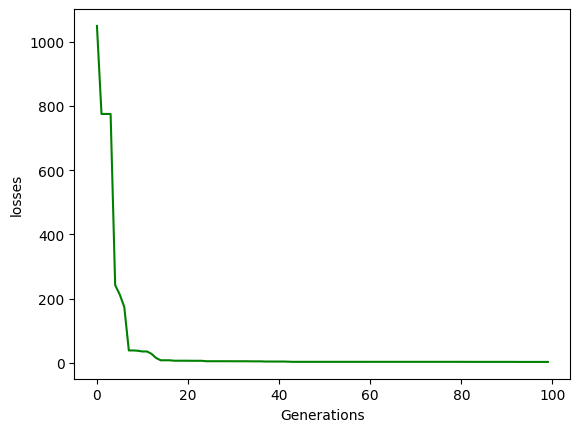

In [20]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.plot(losses_list, c='green')
  plt.xlabel('Generations')
  plt.ylabel('losses')
  plt.show()


losses_list, population = run_ga()
visualize_loss(losses_list)

[4.985715679316428, 0.048689906598547994, 0.1157908864660695, 0.010471673339002008]


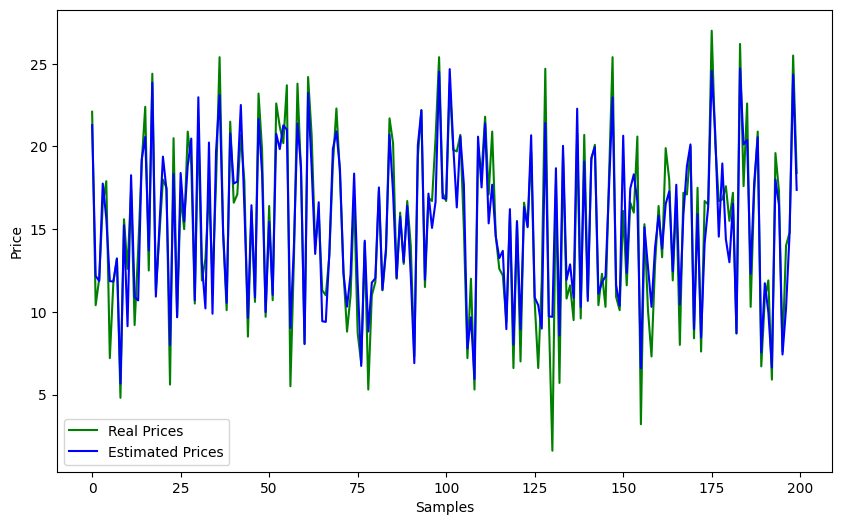

In [21]:
features_x, sales_y = load_data_from_file()
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=lambda individual: compute_fitness(
      individual, features_x, sales_y))
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_x:
      estimated_price = sum(c * x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()


visualize_predict_gt()

In [22]:
import random

# Đặt seed lần đầu
random.seed(42)

# Lần 1 gọi random
print(random.randint(1, 100))  # Ví dụ: 82

# Lần 2 gọi random sẽ sinh số khác vì seed chỉ đặt 1 lần
print(random.randint(1, 100))  # Ví dụ: 15

82
15


In [23]:
import random

# Đặt seed lần đầu
random.seed(42)

# Lần 1 gọi random (đặt lại seed trước khi gọi)
random.seed(42)
print(random.randint(1, 100))  # Ví dụ: 82

# Lần 2 gọi random (đặt lại seed trước khi gọi)
random.seed(42)
print(random.randint(1, 100))  # Kết quả sẽ giống lần 1: 82

82
82
